*Name:* Jorge Eduardo Angarita Pérez

*Student Code:* 2248431

In this code, some DL optimizers are implemented

First, some libraries are imported.

In [25]:
import numpy as np                          # General numerical data processing
import matplotlib.pyplot as plt             # Plots

### **Previous steps:**

Some required multiple variable functions are defined:

In [26]:
# Multiple - Variable Derivatives

def Partial_deriv(f, x, index, delta):
    # Derivative usign centered difference equation
    x_deltaP = x.copy()
    x_deltaN = x.copy()

    # Increase/Decrease in the required coordinate
    x_deltaP[index] += delta
    x_deltaN[index] -= delta
    return (f(x_deltaP) - f(x_deltaN)) / (2*delta)

def Gradient(f, x, delta):
    grad = x.copy()
    for i in range(len(x)):
        grad[i] = Partial_deriv(f, x, i, delta)
    return grad

### **Algorithms**

#### *i) Gradient Descend with learning rate*

In [27]:
def GraDeLR(f, x_ini, delta_deriv, epsilon_stop, l_rate=0.001, max_iters=1E+04):
    # Initial values
    x = np.array(x_ini, dtype=float)

    # Number of iterations
    k = 0
    
    # History of each iterations
    history = [x.copy()]
    
    print('\n >> Gradient Descend w/o line search <<')
    while True:
        # Increase iterations counter
        k += 1

        # Direction is given by the reflected gradient
        grad_x = Gradient(f, x, delta_deriv)

        # Calculate the step (delta_x)
        delta_x = - grad_x * l_rate 

        # Update next "x" value
        x_next = x + delta_x

        # Save each update
        history.append(x_next.copy())
        
        # Stop criteria
        if(np.linalg.norm(grad_x) < epsilon_stop or k > max_iters):
            print(f'STOP: Gradient Norm = {np.linalg.norm(grad_x)}')
            break

        # Update x value
        x = x_next
        
    print(f'Final Value = {x_next} \nIterations = {k}')
    return x_next, history

#### *ii) ADAptative GRAdient (AdaGrad)*

In [ ]:
def AdaGrad(f, x_ini, delta_deriv, epsilon_stop, l_rate=0.001, max_iters=1E+04):
    # Initial values
    x = np.array(x_ini, dtype=float)

    # Number of iterations
    k = 0
    
    # History of each iteration
    history = [x.copy()]
    
    # Squared Accumulated Gradient (r)
    r = np.zeros_like(x)

    print('\n >> AdaGrad Optimization <<')
    while True:
        # Increase iterations counter
        k += 1

        # Calculate the gradient at the current point
        grad_x = Gradient(f, x, delta_deriv)

        # Update the accumulated gradient (r)
        r += grad_x**2

        # Calculate the adaptive step (delta_x)
        delta_x = - grad_x * l_rate / (np.sqrt(r) + delta_deriv)

        # Update x to the next value
        x_next = x + delta_x

        # Save each update in history
        history.append(x_next.copy())
        
        # Stop criteria
        if (np.linalg.norm(grad_x) < epsilon_stop or k >= max_iters):
            print(f'STOP: Gradient Norm = {np.linalg.norm(grad_x)}')
            break

        # Update x value
        x = x_next

    print(f'Final Value = {x_next} \nIterations = {k}')
    return x_next, history


#### *iii) RMSProb*

In [29]:
def RMSProb(f, x_ini, delta_deriv, epsilon_stop, l_rate=0.001, decay_rate=0.9, max_iters=1E+04):
    # Initial values
    x = np.array(x_ini, dtype=float)

    # Number of iterations
    k = 0
    
    # History of each iteration
    history = [x.copy()]
    
    # Squared Accumulated Gradient (r)
    r = np.zeros_like(x)

    print('\n >> RMSProb Optimization <<')
    while True:
        # Increase iterations counter
        k += 1

        # Calculate the gradient at the current point
        grad_x = Gradient(f, x, delta_deriv)

        # Update the accumulated gradient (r)
        r = decay_rate * r + (1 - decay_rate) * grad_x**2

        # Calculate the adaptive step (delta_x)
        delta_x = - grad_x * l_rate / np.sqrt(r + 10E-8)

        # Update x to the next value
        x_next = x + delta_x

        # Save each update in history
        history.append(x_next.copy())
        
        # Stop criteria
        if (np.linalg.norm(grad_x) < epsilon_stop or k >= max_iters):
            print(f'STOP: Gradient Norm = {np.linalg.norm(grad_x)}')
            break

        # Update x value
        x = x_next

    print(f'Final Value = {x_next} \nIterations = {k}')
    return x_next, history


### **_Testing_**

Function to optimize

In [30]:
def f_obj(x):
    y = 100 * (x[0]-1)**2 + (x[1]-2)**2
    return y

Plot the objective function with the analytical minimum for the following range of values:

Absolute mininum evaluation: 0


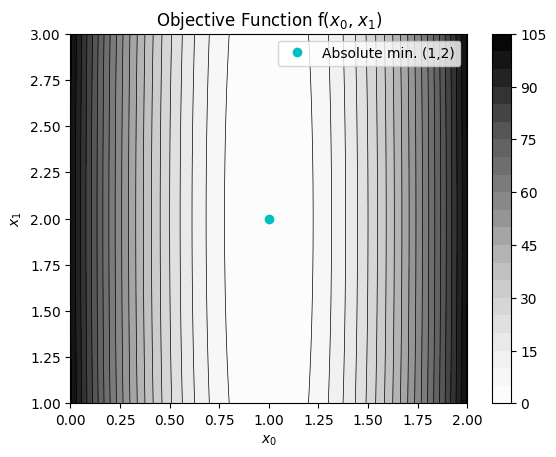

In [31]:
# Grid generation
x = np.linspace(0, 2, 100)
y = np.linspace(1, 3, 100)
X, Y = np.meshgrid(x, y)

# Function evaluation
Z = f_obj([X, Y])

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

# Indicate minimum
plt.plot(1, 2, 'co', markersize=6, label='Absolute min. (1,2)')         

plt.legend()
plt.title('Objective Function f($x_0$, $x_1$)')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')

print(f'Absolute mininum evaluation: { f_obj([1,2])}')

In [32]:
# Parameters for the algorithm
delta = 1E-1
epsilon = 1E-3
x_initial = [0.25, 1.5]

# Run Optimization
x, GrDeLR_History = GraDeLR(f_obj, x_initial, delta, epsilon, 0.009)
x, AdaGra_History = AdaGrad(f_obj, x_initial, delta, epsilon, 0.1)
x, RMSPro_History = RMSProb(f_obj, x_initial, delta, epsilon, 0.1)



 >> Gradient Descend w/o line search <<
STOP: Gradient Norm = 0.000987362995899417
Final Value = [1.        1.9995152] 
Iterations = 382

 >> AdaGrad Optimization <<
STOP: Gradient Norm = 0.0009562793163770443
Final Value = [0.99999547 2.        ] 
Iterations = 216

 >> RMSProb Optimization <<
STOP: Gradient Norm = 0.0009730521280498783
Final Value = [0.99999885 2.        ] 
Iterations = 17


Plot trayectories

Text(0, 0.5, '$x_2$')

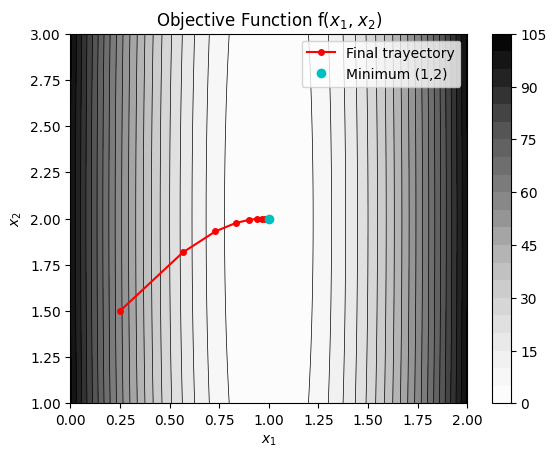

In [33]:
# Set History
#History_show = np.array(GrDeLR_History)
#History_show = np.array(AdaGra_History)
History_show = np.array(RMSPro_History)

# Plot Function with colors
contour_filled = plt.contourf(X, Y, Z, 20, cmap='Greys')

# Plot contour lines
contour_lines = plt.contour(X, Y, Z, 20, colors='black', linewidths=0.5)

# Add Colorbar legend
plt.colorbar(contour_filled)

# Plot History
plt.plot(History_show[:, 0], History_show[:, 1], 'ro-', markersize=4, 
         label="Final trayectory")

# Indicate minimum
plt.plot(1, 2, 'co', markersize=6, label='Minimum (1,2)')          

plt.legend()
plt.title('Objective Function f($x_1$, $x_2$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')